In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# Data cleaning and feature engineering from Part 1

In [3]:
train_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
test_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")

In [4]:
train_data.dropna(subset=['Electrical'], inplace=True)

In [5]:
test_missing_columns = test_data.isnull().any()
columns_with_missing_data_indices = test_missing_columns[test_missing_columns].index.tolist()
columns_with_missing_data_indices

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [6]:
train_data.drop(columns=columns_with_missing_data_indices, axis=1, inplace=True)
test_data.drop(columns=columns_with_missing_data_indices, axis=1, inplace=True)

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
train_data.drop(columns='MSSubClass', axis=1, inplace=True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('crest')
sns.set_style('whitegrid')
sns.despine()
sns.set_context('paper')

<Figure size 640x480 with 0 Axes>

In [10]:
train_data['YrFBuild'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['YrFRemod'] = train_data['YrSold'] - train_data['YearRemodAdd']
train_data.head(5)

,Id,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,YrFBuild,YrFRemod
0,1,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,856,854,0,1710,2,1,3,1,8,0,Y,0,61,0,0,0,0,0,2,2008,Normal,208500,5,5
1,2,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,SBrkr,1262,0,0,1262,2,0,3,1,6,1,Y,298,0,0,0,0,0,0,5,2007,Normal,181500,31,31
2,3,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,920,866,0,1786,2,1,3,1,6,1,Y,0,42,0,0,0,0,0,9,2008,Normal,223500,7,6
3,4,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,3,1,7,1,Y,0,35,272,0,0,0,0,2,2006,Abnorml,140000,91,36
4,5,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1145,1053,0,2198,2,1,4,1,9,1,Y,192,84,0,0,0,0,0,12,2008,Normal,250000,8,8


In [11]:
train_data['LowQualFinSF'].describe()

count    1459.000000
mean        5.848526
std        48.639512
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

# Linear regression with previously selected features (see Part 1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_data.rename(columns={"1stFlrSF": "FirstFlrSF", "2ndFlrSF": "SecondFlrSF"}, inplace=True)
train_data.head()

,Id,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,YrFBuild,YrFRemod
0,1,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,856,854,0,1710,2,1,3,1,8,0,Y,0,61,0,0,0,0,0,2,2008,Normal,208500,5,5
1,2,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,SBrkr,1262,0,0,1262,2,0,3,1,6,1,Y,298,0,0,0,0,0,0,5,2007,Normal,181500,31,31
2,3,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,920,866,0,1786,2,1,3,1,6,1,Y,0,42,0,0,0,0,0,9,2008,Normal,223500,7,6
3,4,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,3,1,7,1,Y,0,35,272,0,0,0,0,2,2006,Abnorml,140000,91,36
4,5,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1145,1053,0,2198,2,1,4,1,9,1,Y,192,84,0,0,0,0,0,12,2008,Normal,250000,8,8


In [14]:
test_data.rename(columns={"1stFlrSF": "FirstFlrSF", "2ndFlrSF": "SecondFlrSF"}, inplace=True)
test_data.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,896,0,0,896,1,0,2,1,5,0,Y,140,0,0,0,120,0,0,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,1329,0,0,1329,1,1,3,1,6,0,Y,393,36,0,0,0,0,12500,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,TA,TA,PConc,GasA,Gd,Y,SBrkr,928,701,0,1629,2,1,3,1,6,1,Y,212,34,0,0,0,0,0,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,SBrkr,926,678,0,1604,2,1,3,1,7,1,Y,360,36,0,0,0,0,0,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1280,0,0,1280,2,0,2,1,5,0,Y,0,82,0,0,144,0,0,1,2010,Normal


In [15]:
X = train_data[['LotArea','OverallQual','FirstFlrSF','SecondFlrSF','Fireplaces','WoodDeckSF','OpenPorchSF','YrFBuild', 'YrFRemod']]
y = train_data['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

This time, let's try statsmodel Python module.

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
ols_formula = 'SalePrice ~ LotArea + OverallQual + FirstFlrSF + SecondFlrSF + Fireplaces + WoodDeckSF + OpenPorchSF + YrFBuild + YrFRemod'

ols_data = pd.concat([X_train, y_train], axis = 1)

OLS = ols(formula = ols_formula, data = ols_data)

model = OLS.fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     364.1
Date:                Wed, 24 Sep 2025   Prob (F-statistic):          2.61e-320
Time:                        14:42:55   Log-Likelihood:                -13128.
No. Observations:                1094   AIC:                         2.628e+04
Df Residuals:                    1084   BIC:                         2.633e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.842e+04   8724.200     -5.550      0.000   -6.55e+04   -3.13e+04
LotArea         0.5575      0.123      4.544      0.000       0.317       0.798
OverallQual  2.289e+04   1393.960     16.423      0.000    2.02e+04    2.56e+04
FirstFlrSF     68.4322      4.313     15.865      0.000      59.969      76.896
SecondFlrSF    41.0388      3.407     12.045      0.000      34.353      47.724
Fireplaces   8373.0804   2193.413      3.817      0.000    4069.265    1.27e+04
WoodDeckSF     38.1544     10.084      3.784      0.000      18.369      57.940
OpenPorchSF     4.7545     18.895      0.252      0.801     -32.320      41.829
YrFBuild     -325.4733     54.506     -5.971      0.000    -432.422    -218.525
YrFRemod     -333.5204     77.437     -4.307      0.000    -485.465    -181.576
==============================================================================
Omnibus:                      327.276   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33526.503
Skew:                          -0.215   Prob(JB):                         0.00
Kurtosis:                      30.117   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since p-value of the variable 'OpenPorchSF' is greater than 0.05, its coefficient should not be considered statistically significant. We should exclude it from our model.

# Feature engineering 

## Target encoding

Target encoding involves replacing a category with the mean or median of the target variable for that category. The median was chosen in our case as it is more robust to outliers.

Training data is used to calculate the median of the target variable for each category. Then the categorical values in the training set are replaced with the medians calculated in the previous step. The same medians calculated from the training set are used to encode the categories in validation set.

In [19]:
X = train_data[['LotArea','OverallQual','FirstFlrSF','SecondFlrSF','Fireplaces','WoodDeckSF','OpenPorchSF','YrFBuild', 'YrFRemod', 'Neighborhood','BldgType','HouseStyle','SaleCondition']]
y = train_data['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
Neighborhood_train = train_data['Neighborhood'].loc[list(X_train.index)]
prices_train = train_data['SalePrice'].loc[list(X_train.index)]

Neighborhood_prices = pd.concat([Neighborhood_train, prices_train], axis=1)
NP_gr = Neighborhood_prices.groupby('Neighborhood')['SalePrice'].median().reset_index()
NP_gr = NP_gr.rename(columns={'SalePrice':'MedianPriceNeighborhood'})
NP_gr

,Neighborhood,MedianPriceNeighborhood
0,Blmngtn,181000.0
1,Blueste,124000.0
2,BrDale,100000.0
3,BrkSide,118500.0
4,ClearCr,196000.0
5,CollgCr,200000.0
6,Crawfor,200100.0
7,Edwards,127500.0
8,Gilbert,184550.0
9,IDOTRR,107250.0


In [21]:
BldgType_train = train_data['BldgType'].loc[list(X_train.index)]

BldgType_prices = pd.concat([BldgType_train, prices_train], axis=1)
BT_gr = BldgType_prices.groupby('BldgType')['SalePrice'].median().reset_index()
BT_gr = BT_gr.rename(columns={'SalePrice':'MedianPriceBldgType'})
BT_gr

,BldgType,MedianPriceBldgType
0,1Fam,165500.0
1,2fmCon,128250.0
2,Duplex,135000.0
3,Twnhs,137500.0
4,TwnhsE,174000.0


In [22]:
HouseStyle_train = train_data['HouseStyle'].loc[list(X_train.index)]

HouseStyle_prices = pd.concat([HouseStyle_train, prices_train], axis=1)
HS_gr = HouseStyle_prices.groupby('HouseStyle')['SalePrice'].median().reset_index()
HS_gr = HS_gr.rename(columns={'SalePrice':'MedianPriceHouseStyle'})
HS_gr

,HouseStyle,MedianPriceHouseStyle
0,1.5Fin,133950.0
1,1.5Unf,111250.0
2,1Story,154000.0
3,2.5Fin,200000.0
4,2.5Unf,129500.0
5,2Story,190000.0
6,SFoyer,135960.0
7,SLvl,158000.0


In [23]:
SaleCondition_train = train_data['SaleCondition'].loc[list(X_train.index)]

SaleCondition_prices = pd.concat([SaleCondition_train, prices_train], axis=1)
SC_gr = SaleCondition_prices.groupby('SaleCondition')['SalePrice'].median().reset_index()
SC_gr = SC_gr.rename(columns={'SalePrice':'MedianPriceSaleCondition'})
SC_gr

,SaleCondition,MedianPriceSaleCondition
0,Abnorml,132000.0
1,AdjLand,104000.0
2,Alloca,160976.5
3,Family,135000.0
4,Normal,159000.0
5,Partial,248328.0


In [24]:
ind = list(X_train.index)

In [25]:
X_train = X_train.merge(NP_gr, on='Neighborhood')
X_train = X_train.merge(BT_gr, on='BldgType')
X_train = X_train.merge(HS_gr, on='HouseStyle')
X_train = X_train.merge(SC_gr, on='SaleCondition')
X_train.index = ind
X_train

,LotArea,OverallQual,FirstFlrSF,SecondFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF,YrFBuild,YrFRemod,Neighborhood,BldgType,HouseStyle,SaleCondition,MedianPriceNeighborhood,MedianPriceBldgType,MedianPriceHouseStyle,MedianPriceSaleCondition
847,15523,5,864,0,1,0,0,37,37,CollgCr,1Fam,1Story,Normal,200000.0,165500.0,154000.0,159000.0
809,8100,5,1075,1063,0,40,156,111,44,OldTown,1Fam,2.5Unf,Normal,122250.0,165500.0,129500.0,159000.0
1384,9060,6,698,560,0,0,0,70,59,Edwards,1Fam,1.5Fin,Normal,127500.0,165500.0,133950.0,159000.0
1061,18000,3,894,0,0,0,20,73,58,IDOTRR,1Fam,1Story,Normal,107250.0,165500.0,154000.0,159000.0
952,7200,5,768,0,0,192,0,37,6,CollgCr,1Fam,SFoyer,Normal,200000.0,165500.0,135960.0,159000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,9317,6,1314,0,1,0,22,1,1,CollgCr,1Fam,1Story,Normal,200000.0,165500.0,154000.0,159000.0
1130,7804,4,1328,653,2,431,44,81,59,SWISU,1Fam,1.5Fin,Normal,137450.0,165500.0,133950.0,159000.0
1294,8172,5,864,0,0,0,0,51,16,Edwards,1Fam,1Story,Normal,127500.0,165500.0,154000.0,159000.0
860,7642,7,912,514,1,0,240,89,9,Crawfor,1Fam,1.5Fin,Normal,200100.0,165500.0,133950.0,159000.0


In [26]:
ind_val = list(X_val.index)

In [27]:
X_val = X_val.merge(NP_gr, on='Neighborhood')
X_val = X_val.merge(BT_gr, on='BldgType')
X_val = X_val.merge(HS_gr, on='HouseStyle')
X_val = X_val.merge(SC_gr, on='SaleCondition')
X_val.index = ind_val
X_val

,LotArea,OverallQual,FirstFlrSF,SecondFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF,YrFBuild,YrFRemod,Neighborhood,BldgType,HouseStyle,SaleCondition,MedianPriceNeighborhood,MedianPriceBldgType,MedianPriceHouseStyle,MedianPriceSaleCondition
1321,6627,3,720,0,0,0,0,59,58,BrkSide,1Fam,1Story,Normal,118500.0,165500.0,154000.0,159000.0
836,8100,5,1559,0,0,0,116,59,34,OldTown,1Fam,1Story,Normal,122250.0,165500.0,154000.0,159000.0
413,8960,5,1028,0,1,0,0,83,60,OldTown,1Fam,1Story,Normal,122250.0,165500.0,154000.0,159000.0
522,5000,6,1004,660,2,0,24,59,56,BrkSide,1Fam,1.5Fin,Normal,118500.0,165500.0,133950.0,159000.0
1035,11500,4,845,0,0,186,0,52,52,Edwards,1Fam,1Story,Normal,127500.0,165500.0,154000.0,159000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,9945,5,988,0,0,0,0,46,46,Sawyer,1Fam,1Story,Normal,132500.0,165500.0,154000.0,159000.0
243,10762,6,626,591,1,0,28,29,29,SawyerW,TwnhsE,2Story,Normal,176000.0,174000.0,190000.0,159000.0
1036,12898,9,1620,0,1,228,0,2,1,Timber,1Fam,1Story,Normal,224500.0,165500.0,154000.0,159000.0
910,11600,5,1105,1169,0,0,0,50,50,NAmes,Duplex,2Story,Normal,140000.0,135000.0,190000.0,159000.0


# Linear regression with new features

In [28]:
ols_formula = 'SalePrice ~ LotArea + OverallQual + FirstFlrSF + SecondFlrSF + Fireplaces + WoodDeckSF + YrFBuild + YrFRemod + MedianPriceNeighborhood + MedianPriceBldgType + MedianPriceHouseStyle + MedianPriceSaleCondition'

ols_data = pd.concat([X_train, y_train], axis = 1)

OLS = ols(formula = ols_formula, data = ols_data)

model = OLS.fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     351.4
Date:                Wed, 24 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:42:55   Log-Likelihood:                -13020.
No. Observations:                1094   AIC:                         2.607e+04
Df Residuals:                    1081   BIC:                         2.613e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.631e+05   2.51e+04     -6.490      0.000   -2.12e+05   -1.14e+05
LotArea                      0.4348      0.112      3.892      0.000       0.216       0.654
OverallQual               1.498e+04   1373.441     10.910      0.000    1.23e+04    1.77e+04
FirstFlrSF                  63.9967      3.969     16.123      0.000      56.208      71.785
SecondFlrSF                 43.7892      3.821     11.461      0.000      36.292      51.286
Fireplaces                6784.2977   2014.427      3.368      0.001    2831.668    1.07e+04
WoodDeckSF                  38.3529      9.206      4.166      0.000      20.290      56.416
YrFBuild                   -49.4645     55.035     -0.899      0.369    -157.452      58.523
YrFRemod                  -186.7400     71.101     -2.626      0.009    -326.251     -47.228
MedianPriceNeighborhood      0.3989      0.031     12.964      0.000       0.339       0.459
MedianPriceBldgType          0.3419      0.118      2.893      0.004       0.110       0.574
MedianPriceHouseStyle       -0.0882      0.076     -1.153      0.249      -0.238       0.062
MedianPriceSaleCondition     0.2737      0.045      6.035      0.000       0.185       0.363
==============================================================================
Omnibus:                      309.056   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26356.631
Skew:                           0.147   Prob(JB):                         0.00
Kurtosis:                      27.044   Cond. No.                     7.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the p-value of the variables 'YrFBuild' and 'MedianPriceHouseStyle' is greater than 0.05, their coefficients should not be considered statistically significant. We should exclude them from our model.

In [30]:
ols_formula = 'SalePrice ~ LotArea + OverallQual + FirstFlrSF + SecondFlrSF + Fireplaces + WoodDeckSF + YrFRemod + MedianPriceNeighborhood + MedianPriceBldgType + MedianPriceSaleCondition'

ols_data = pd.concat([X_train, y_train], axis = 1)

OLS = ols(formula = ols_formula, data = ols_data)

model = OLS.fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     421.6
Date:                Wed, 24 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:42:56   Log-Likelihood:                -13021.
No. Observations:                1094   AIC:                         2.606e+04
Df Residuals:                    1083   BIC:                         2.612e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.812e+05   2.08e+04     -8.726      0.000   -2.22e+05    -1.4e+05
LotArea                      0.4376      0.112      3.922      0.000       0.219       0.656
OverallQual               1.518e+04   1349.876     11.243      0.000    1.25e+04    1.78e+04
FirstFlrSF                  64.1917      3.930     16.333      0.000      56.480      71.903
SecondFlrSF                 40.7902      3.032     13.451      0.000      34.840      46.740
Fireplaces                6669.3847   2011.863      3.315      0.001    2721.794    1.06e+04
WoodDeckSF                  38.9913      9.176      4.249      0.000      20.986      56.996
YrFRemod                  -197.6277     66.561     -2.969      0.003    -328.231     -67.024
MedianPriceNeighborhood      0.4042      0.029     14.059      0.000       0.348       0.461
MedianPriceBldgType          0.3432      0.118      2.910      0.004       0.112       0.575
MedianPriceSaleCondition     0.2786      0.045      6.182      0.000       0.190       0.367
==============================================================================
Omnibus:                      309.161   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26335.398
Skew:                           0.150   Prob(JB):                         0.00
Kurtosis:                      27.034   Cond. No.                     5.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
from sklearn import metrics

In [33]:
y_predict = model.predict(X_val)

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_predict)))

Mean Absolute Error: 21605.06619125605
Mean Squared Error: 1024740582.333944
Root Mean Squared Error: 32011.569507506876


In [35]:
metrics.explained_variance_score(y_val, y_predict)

0.8438351004969004

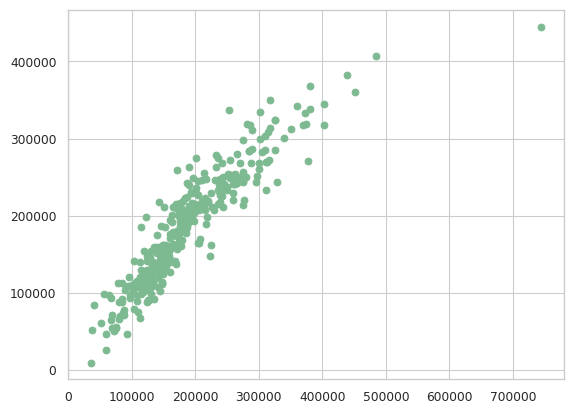

In [36]:
plt.scatter(y_val, y_predict)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


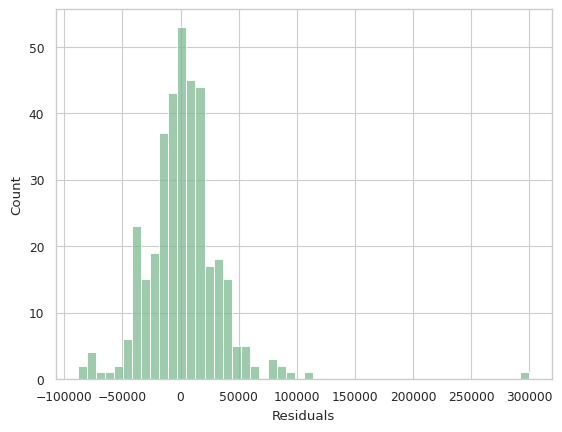

In [37]:
fig = sns.histplot((y_val-y_predict), bins=50)
fig.set_xlabel('Residuals')
plt.show()

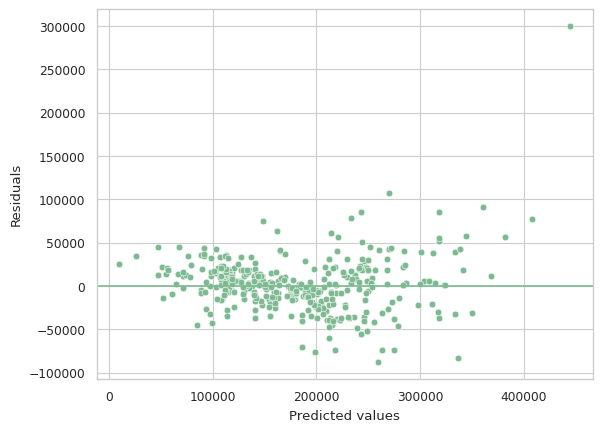

In [38]:
fig = sns.scatterplot(x=y_predict, y=y_val-y_predict)
fig.set_xlabel('Predicted values')
fig.set_ylabel('Residuals')

fig.axhline(0)
plt.show()

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables.
df_1 = X_train[['LotArea','OverallQual','FirstFlrSF','SecondFlrSF','Fireplaces','WoodDeckSF','YrFRemod','MedianPriceNeighborhood','MedianPriceBldgType','MedianPriceSaleCondition']]
df_2 = X_val[['LotArea','OverallQual','FirstFlrSF','SecondFlrSF','Fireplaces','WoodDeckSF','YrFRemod','MedianPriceNeighborhood','MedianPriceBldgType','MedianPriceSaleCondition']]
X_concat = pd.concat([df_1, df_2])

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X_concat.values, i) for i in range(X_concat.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X_concat.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
LotArea,2.474236
OverallQual,58.444088
FirstFlrSF,19.198118
SecondFlrSF,2.315138
Fireplaces,2.632816
WoodDeckSF,1.774867
YrFRemod,3.263983
MedianPriceNeighborhood,23.462997
MedianPriceBldgType,66.677079
MedianPriceSaleCondition,43.439326


The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable is added to the linear regression. It is a measure for multicollinearity.

One recommendation is that if VIF is greater than 5, then the explanatory variable is highly collinear with the other explanatory variables.